## 프로젝트 - 뉴스 카테고리 다중분류
### Reuters_Classification
***
### Step 1. 로이터 뉴스데이터
-로이터 뉴스데이터를 확인해 봅시다.  
-정수로 된 데이터들을 다시 문장으로 복원하고 이를 다시 벡터화해 봅시다.

### Step 2. 다양한 분류모델 사용해보기
-나이브 베이즈 분류기, F1-Score, Confusion Matrix, 머신러닝 모델 등 다양한 분류 모델을 사용해 봅시다.

### Step 3. Vocabulry Size를 변경해보기
-뉴스데이터를 확인할 때 지정해 주었던 Vocabulry Size를 변경하여 분류모델을 사용해 봅시다.  
-공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

### Step 4. 딥러닝 모델과 비교해보기
-RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 비교해봅시다.  
-공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.
***
### 평가문항
**1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?**  
-3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.  

**2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?**  
-Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.  

**3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?**  
-동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.  
***
### Step 1. 로이터 뉴스데이터
-로이터 뉴스데이터를 확인해 봅시다.  
-정수로 된 데이터들을 다시 문장으로 복원하고 이를 다시 벡터화해 봅시다.
***
**-데이터 확인해보기**

In [1]:
# 라이브러리 가져오기
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# 훈련 데이터와 테스트 데이터 로드하기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
# 로이터 데이터에서 단어사전 길이 10000개로 설정하여 훈련:테스트 비율 8:2로 가져오기

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


-문자형식으로 되어있는 것이 아니라 정수로 변환되어있는 형태로 데이터가 출력된다.

In [5]:
print(y_train[0])
print(y_test[0])

3
3


-레이블 또한 정수로 되어있다.

In [7]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


-전체 클래스의 수는 46개이다.

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


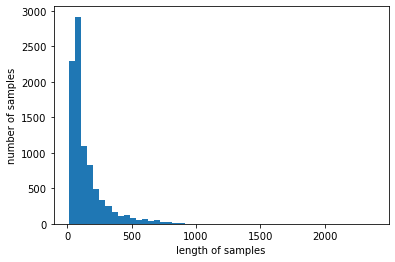

In [9]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

-훈련용 뉴스의 길이가 0~250사이에 몰려있는것을 확인할 수 있다.

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

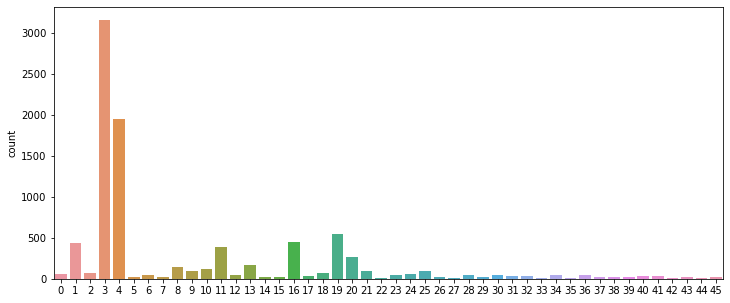

In [10]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [11]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


-각 클래스의 빈도수를 확인해본 결과, 3번 4번 클래스에 대부분의 결과값이 모여있는 것을 확인할 수 있다.
***
**-문장 복원하기**

In [12]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

-단어를 key값으로 고유한 정수를 value값으로 가지는 word to index dictionary는 로이터 뉴스데이터에서 제공해준다.  
-우리는 이를 가지고 정수를 key값으로 단어를 value값으로 같는 index to word dictionary를 만들어서 문장을 복원한다.

In [13]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

-로이터 뉴스데이터의 word to index dictionary는 \<PAD>, \<SOS>, \<UNK> 3개의 토큰이 생략되어있다.  
-따라서 index번호에 +3을 해주어야한다.

In [14]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

-위에서 index+3으로 key값을 지정해주게 되면서 0에서 2까지의 key/value는 존재하지 않는 dictionary가 되었다.  
-0에서 2까지의 value는 \<PAD>, \<SOS>, \<UNK>이므로 이를 추가해준다.

In [15]:
print(x_train[0])
print(' '.join([index_to_word[index] for index in x_train[0]]))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


-첫 번째 훈련용 뉴스기사를 원래의 문장으로 변환하였다.  
-단어사전의 길이가 부족하여 없는 단어로 변경된 단어들도 있지만 대체로 잘 복원되었다.

In [16]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [17]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [18]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [19]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

-학습데이터, 테스트데이터 모두 정수->문장으로 잘 복원되었다.
***
**-벡터화 하기**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer #빈도수 행렬을 위한 라이브러리
from sklearn.feature_extraction.text import TfidfTransformer #빈도수-역빈도수를 활용한 행렬을 만들기 위한 라이브러리

In [21]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


-빈도수 행렬을 만들어줍니다.  
